# Clusterização

- Execute os algoritmos de agrupamento K-means e Hierárquico com diferentes valores de clusters e escolha o melhor resultado.

Para o hierárquico, varie entre o single e complete linkage e analise os resultados obtidos.

Para o k-means, inicialize os centroides aleatoriamente e avalie o impacto da inicialização nos resultados encontrados. 

**Bônus**: normalizar os dados e executar novamente os algoritmos para analisar os resultados gerados.
Fazer visualização dos clusters encontrados com PCA ou t-SNE.

## Sumário

* Bibliotecas
* Pré-Processamento
     * Verificando Dados
     * Dados Ausentes
     * Dados Duplicados
     * Dados Não Numéricos
     * Identificando Outliers
     * Correlação
* Algoritmo de Agrupamento sem Normalização
* Normalização
* Algoritmo de Agrupamento com Normalização
* Visualização dos Clusters
* Conclusão




# Bibliotecas

Assim como nas outras questões, primeiro é necessário realizar a importação das dependências.

In [1]:
from scipy import stats
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing, decomposition, cluster, model_selection, metrics, manifold

# Base de Dados

Realizando a leitura da base de dados.

In [8]:
df_base = pd.read_csv('Live.csv')
df_base.head()


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


A partir da leitura da base de dados, temos as informações que ela possui 16 atributos ao todo. E que em algumas colunas esta faltando dado.

# Pré-Processamento

É preciso realizar um pré-processamento na base de dados.

## Verificando os Dados

In [9]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
status_id           7050 non-null object
status_type         7050 non-null object
status_published    7050 non-null object
num_reactions       7050 non-null int64
num_comments        7050 non-null int64
num_shares          7050 non-null int64
num_likes           7050 non-null int64
num_loves           7050 non-null int64
num_wows            7050 non-null int64
num_hahas           7050 non-null int64
num_sads            7050 non-null int64
num_angrys          7050 non-null int64
Column1             0 non-null float64
Column2             0 non-null float64
Column3             0 non-null float64
Column4             0 non-null float64
dtypes: float64(4), int64(9), object(3)
memory usage: 881.4+ KB


A base de dados possui tanto dados numéricos(13 no total) como dados não numéricos(3 no total). Se faz necessário analizar os atributos, principalmente os não numéricos, pois se tiverem relevância, eles serão convertidos para valores numéricos.

## Dados Ausentes

In [10]:
df_base.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

A base de dados possui 4 atributos(**Column1, Column2, Column3 e Column4**)  do qual, em todas as suas instâncias, está faltando dados. O ideal é remover esses atributos.

In [11]:
df_base = df_base.drop(columns=['Column1','Column2','Column3','Column4'])
df_base.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


## Dados Duplicados

Verificando se existem dados duplicados. 

In [12]:

pd.set_option('display.max_rows', None)
df_base[df_base.duplicated(keep=False)]

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
6170,819700534875473_1002372733274918,video,6/10/2018 3:43,376,20,3,354,19,3,0,0,0
6171,819700534875473_1001982519980606,photo,6/9/2018 22:53,255,7,4,249,6,0,0,0,0
6172,819700534875473_1000607730118085,photo,6/7/2018 7:01,1704,21,3,1685,15,2,2,0,0
6173,819700534875473_999880033524188,status,6/6/2018 2:20,205,39,4,197,4,4,0,0,0
6174,819700534875473_998824716963053,photo,6/4/2018 6:57,336,42,2,285,5,0,0,46,0
6175,819700534875473_997075427137982,status,6/1/2018 0:35,111,2,1,110,1,0,0,0,0
6176,819700534875473_995933077252217,photo,5/30/2018 6:33,357,18,9,352,3,1,1,0,0
6177,819700534875473_995839410594917,photo,5/30/2018 2:39,114,7,0,109,3,2,0,0,0
6178,819700534875473_995218893990302,status,5/29/2018 4:39,133,7,1,127,6,0,0,0,0
6179,819700534875473_993975437447981,photo,5/27/2018 1:31,532,32,4,480,47,5,0,0,0


Esses são todos os dados duplicados que a base de dados possui. Ele serão removidos. 

Permanecerá, na base, só uma instância de cada duplicação.

In [13]:
df_base.drop_duplicates(keep = 'first', inplace = True)

In [14]:
df_base.reset_index(inplace = True)

In [15]:
df_base.drop(columns = ['index'],inplace = True)

## Dados Não Numéricos

Como a base de dados possui valores não numéricos em alguns atributos, é preciso realizar uma verificação para saber quais são esses valores. 

In [17]:
print("Valores não numéricos presentes em 'status_id':",df_base['status_id'].unique(), "\n\n")
print("Valores não numéricos presentes em 'status_type':",df_base['status_type'].unique(), "\n\n")
print("Valores não numéricos presentes em 'status_published':",df_base['status_published'].unique(), "\n\n")

Valores não numéricos presentes em 'status_id': ['246675545449582_1649696485147474' '246675545449582_1649426988507757'
 '246675545449582_1648730588577397' ...
 '1050855161656896_1060126464063099' '1050855161656896_1058663487542730'
 '1050855161656896_1050858841656528'] 


Valores não numéricos presentes em 'status_type': ['video' 'photo' 'link' 'status'] 


Valores não numéricos presentes em 'status_published': ['4/22/2018 6:00' '4/21/2018 22:45' '4/21/2018 6:17' ... '9/21/2016 23:03'
 '9/20/2016 0:43' '9/10/2016 10:30'] 




Cada atributo não numérico será verificado para saber se o mesmo deve ou não receber algum tratamento.

### status_published

Esse atributo traz a informação da **data e hora** que uma publicação foi feita. Sendo assim, ele será divido em 4 abritutos (**ano, mês, dia e minutos**). A hora será toda quantificada em minutos, para evitar problemas com a quebra da hora em **hora e minutos**.  

In [18]:
df_base['status_published'] = pd.to_datetime(df_base['status_published'])
df_base['year'] = df_base['status_published'].dt.year
df_base['month'] = df_base['status_published'].dt.month
df_base['day'] = df_base['status_published'].dt.day
df_base['minutes'] = df_base['status_published'].dt.minute + (df_base['status_published'].dt.hour)*60
df_base.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,month,day,minutes
0,246675545449582_1649696485147474,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,2018,4,22,360
1,246675545449582_1649426988507757,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,2018,4,21,1365
2,246675545449582_1648730588577397,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,2018,4,21,377
3,246675545449582_1648576705259452,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,2018,4,21,149
4,246675545449582_1645700502213739,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,2018,4,18,202


Sendo assim, não é mais necessário manter **status_published** na base de dados.

In [19]:
df_base = df_base.drop(columns=['status_published'])
df_base.head()

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,month,day,minutes
0,246675545449582_1649696485147474,video,529,512,262,432,92,3,1,1,0,2018,4,22,360
1,246675545449582_1649426988507757,photo,150,0,0,150,0,0,0,0,0,2018,4,21,1365
2,246675545449582_1648730588577397,video,227,236,57,204,21,1,1,0,0,2018,4,21,377
3,246675545449582_1648576705259452,photo,111,0,0,111,0,0,0,0,0,2018,4,21,149
4,246675545449582_1645700502213739,photo,213,0,0,204,9,0,0,0,0,2018,4,18,202


### status_type

Esse dado mostra o tipo de publicação que foi feita. Lidar com esse dado na forma não numérica pode ser trabalhosa. Sendo assim, o ideal é transformar essas instâncias para valores numéricos.

In [20]:
one_hot = pd.get_dummies(df_base['status_type'])
df_base = df_base.drop(columns=['status_type'])
df_base =df_base.join(one_hot)
df_base.head()

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,month,day,minutes,link,photo,status,video
0,246675545449582_1649696485147474,529,512,262,432,92,3,1,1,0,2018,4,22,360,0,0,0,1
1,246675545449582_1649426988507757,150,0,0,150,0,0,0,0,0,2018,4,21,1365,0,1,0,0
2,246675545449582_1648730588577397,227,236,57,204,21,1,1,0,0,2018,4,21,377,0,0,0,1
3,246675545449582_1648576705259452,111,0,0,111,0,0,0,0,0,2018,4,21,149,0,1,0,0
4,246675545449582_1645700502213739,213,0,0,204,9,0,0,0,0,2018,4,18,202,0,1,0,0


Cada _status_type_ (**link, photo, status, video**) foi transformado para numérico utilizando o one-hot encoding.

Sendo assim, cada instância que possuia um tipo de _status_type_ recebeu o valor **1**, enquanto os outros receberam valor **0**. 

### status_id

Esse atributo, possivelmente, está relacionado a identificar uma publicação na base de dados. Por ser um atributo difícil de categorizar, e por dificuldades em realizar alguma transformação sobre o mesmo, ele será removido da base de dados.

In [21]:
df_base = df_base.drop(columns=['status_id'])
df_base.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,month,day,minutes,link,photo,status,video
0,529,512,262,432,92,3,1,1,0,2018,4,22,360,0,0,0,1
1,150,0,0,150,0,0,0,0,0,2018,4,21,1365,0,1,0,0
2,227,236,57,204,21,1,1,0,0,2018,4,21,377,0,0,0,1
3,111,0,0,111,0,0,0,0,0,2018,4,21,149,0,1,0,0
4,213,0,0,204,9,0,0,0,0,2018,4,18,202,0,1,0,0


## Identificando Outliers

Da mesma forma que foi feito na primeira questão, o _Z-score_ será utilizado para identificar os outliers.


Atributos com outliers: 11 (Porcentagem = 0.65)

Total de outliers: 1544


Text(0.5, 1.0, 'Quantidade de Outliers por atributos')

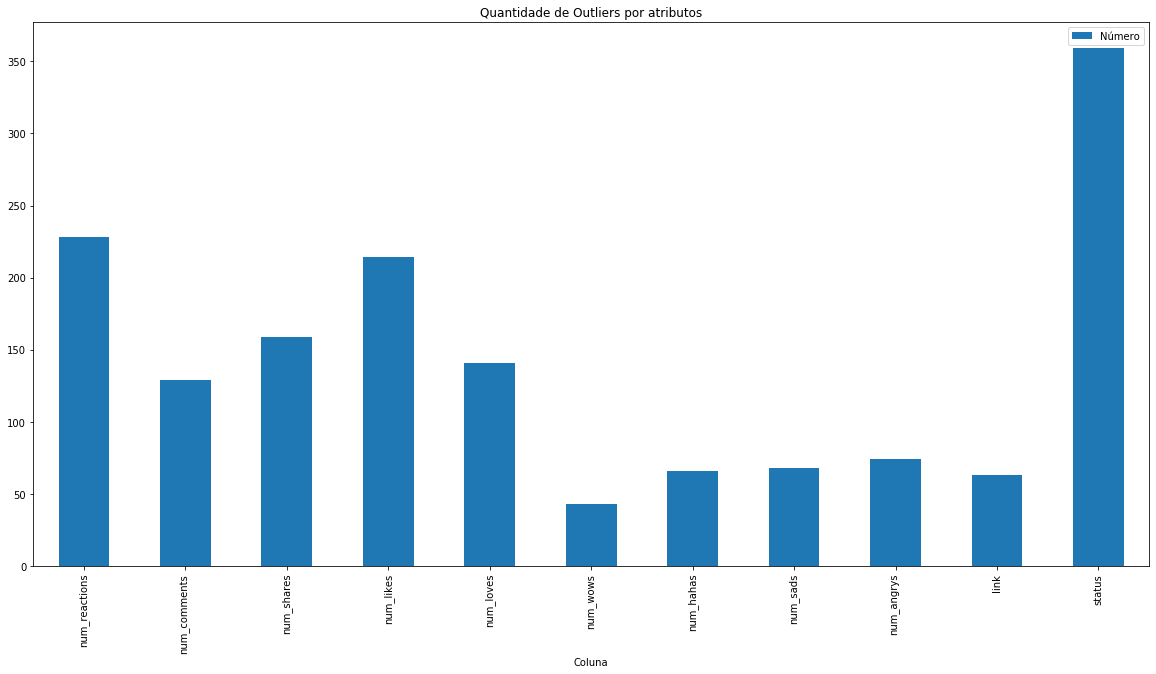

In [23]:
threshold = 3
outliers = []
total = 0
resultado = []

for col in df_base.columns:
    outlier = len(df_base[(np.abs(stats.zscore(df_base[col]))>= threshold)])
    total += outlier
    if(outlier>0):
        outliers.append(df_base[(np.abs(stats.zscore(df_base[col])) >= threshold)])
        resultado.append({"Número":len(df_base[(np.abs(stats.zscore(df_base[col]))>= threshold)]), "Coluna": col})
        
print("\nAtributos com outliers: %d (Porcentagem = %.2f)" % (len(outliers), len(outliers)/len(df_base.columns)))
print("\nTotal de outliers: %d" % (total))

pd.DataFrame(resultado).plot.bar(x = "Coluna", y = "Número", figsize = (20, 10))
plt.title("Quantidade de Outliers por atributos")

Mesmo tendo identificado os outliers na base de dados, não se tem como provar que esse dado é realmente um outlier. Tendo em vista, que essa base de dados traz informações sobre curtidas e reações em publicações realizada em alguma rede social.

O que pode ocorrer é que uma publicação não possui tantas curtidas ou reações quando se comparado as outras. Sendo assim, os outliers não receberão nenhum tipo de tratamento.


# Correlação

obs: Novamente não é possível visualizar a matriz de correlação. Mas ela está na referente página da questão no github [link](https://github.com/LuyzaDomingos/IA/blob/master/Clusterizacao/questao3.ipynb)

In [24]:
correl = df_base.corr()
correl.style.background_gradient(cmap = 'coolwarm')


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,month,day,minutes,link,photo,status,video
num_reactions,1,0.15619,0.25964,0.994672,0.310645,0.261694,0.179657,0.0820938,0.136064,-0.0533684,-0.110125,-0.00426628,0.0173703,0.0305474,-0.14434,0.111805,0.091151
num_comments,0.15619,1,0.640536,0.105934,0.52132,0.163506,0.325064,0.257545,0.239557,0.133876,0.0205591,-0.00940557,-9.10866e-05,-0.0234722,-0.292085,-0.049262,0.330466
num_shares,0.25964,0.640536,1,0.179664,0.820284,0.409803,0.399864,0.218628,0.332355,0.191806,-0.0246425,-0.0116678,-0.0551115,-0.0258851,-0.355012,-0.066359,0.404166
num_likes,0.994672,0.105934,0.179664,1,0.212715,0.200015,0.123129,0.0571095,0.0962764,-0.0771362,-0.106474,-0.00478634,0.0222347,0.0346233,-0.112799,0.121466,0.0531251
num_loves,0.310645,0.52132,0.820284,0.212715,1,0.510148,0.507899,0.226574,0.394818,0.205758,-0.060446,0.00182957,-0.0466761,-0.0295866,-0.352724,-0.0650664,0.401932
num_wows,0.261694,0.163506,0.409803,0.200015,0.510148,1,0.288468,0.0914246,0.191672,0.098587,-0.0594288,0.0101952,-0.00335901,-0.0116051,-0.0903093,-0.00198865,0.0968504
num_hahas,0.179657,0.325064,0.399864,0.123129,0.507899,0.288468,1,0.154035,0.225083,0.113859,-0.0385934,0.00436626,-0.00783382,-0.0159907,-0.159764,-0.0343478,0.184853
num_sads,0.0820938,0.257545,0.218628,0.0571095,0.226574,0.0914246,0.154035,1,0.143711,0.0669101,0.0276283,-0.000825807,0.0233941,-0.0149685,-0.0890924,0.0185845,0.0866359
num_angrys,0.136064,0.239557,0.332355,0.0962764,0.394818,0.191672,0.225083,0.143711,1,0.103209,-0.0249094,-0.0094867,-0.0116462,-0.0152479,-0.126792,-0.028735,0.147906
year,-0.0533684,0.133876,0.191806,-0.0771362,0.205758,0.098587,0.113859,0.0669101,0.103209,1,-0.228028,-0.0488527,-0.0333391,0.00829712,-0.213299,0.0379752,0.201626


Analisando as correlações, os atributos mais correlacionados, são: 
* num_reactions com num_likes 
* num_shares com num_loves 
* num_comments com num_shares 
* num__comments com num_loves
* num_loves com num_woos.

# Algoritmos de Agrupamento sem Normalização

Como requisitado, primeiro serão executados os algoritmos de agrupamento, K-means e Hierárquico (single e complete linkage), sem a normalização dos dados. 

Para todos os caso, os algoritmos serão executados com uma variação de número de clusters de forma exponencial, com **i** variando de 2 a 9.

A métrica de avalição utilizada é a "silhouette". Métrica que retorna um valor que varia de **1 a -1**.
  * 1 - significa que o objeto foi classificado em determinado agrupamento(clusters).
  * 0 - significa que o objeto pode está em dois clusters(não foi bem definido)
  * -1 - o objeto não foi classificado corretamente em um agrupamento.

OBS: No K-means os centroídes serão inicializados de forma aleatória. 




In [25]:
label_kmeans = []
labels_hiesimples = []
labels_hiecompleto = []
silhueta = []

intera = [i**2 for i in range (2, 10)]

for n in intera:
    
    kmeans_r = cluster.KMeans(n_clusters=n,init ="random").fit(df_base) 
    
    cluster_kmeans = df_base.assign(cluster_numero = kmeans_r.predict(df_base))
   

    hierarquico_simples = cluster.AgglomerativeClustering(n_clusters=n, linkage="single")
    hierarquico_completo = cluster.AgglomerativeClustering(n_clusters=n, linkage="complete")
    
    cluster_hierarquico_simples = df_base.assign(cluster_numero = hierarquico_simples.fit_predict(df_base)) 
    cluster_hierarquico_completo = df_base.assign(cluster_numero = hierarquico_completo.fit_predict(df_base))
    
    
    label_kmeans.append(cluster_kmeans)
    labels_hiesimples.append(cluster_hierarquico_simples)
    labels_hiecompleto.append(cluster_hierarquico_completo)
    
    silhueta.append({ "Número de Clusters": n, 
                     "K-Means - aleatório": metrics.silhouette_score(cluster_kmeans,labels = cluster_kmeans['cluster_numero']),
                    "Hierarquico Simples": metrics.silhouette_score(cluster_hierarquico_simples,labels = cluster_hierarquico_simples['cluster_numero']),
                    "Hierarquico Completo": metrics.silhouette_score(cluster_hierarquico_completo,labels = cluster_hierarquico_completo['cluster_numero'])})
    
    
   

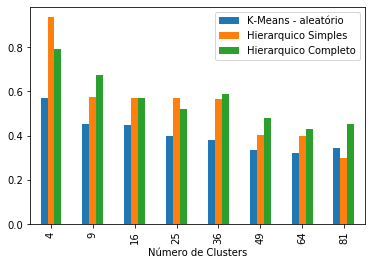

In [26]:
pd.DataFrame(silhueta).plot.bar(x="Número de Clusters",
                                        y =["K-Means - aleatório","Hierarquico Simples","Hierarquico Completo"])
    

A plotagem do gráfico permite uma melhor visualização do que está ocorrendo com o número de clusters e os algoritmos de agrupamento.

Conforme o número de clusters aumenta, o desempenho dos algoritmos vai diminuindo, o que siginifica que eles estão deixando de agrupa os clusters da melhor forma. Ou seja, o objetos estão ficando mais de desorganizados quanto aos clusters.

Em relação ao algoritmos, o Hieráquico( _single e complete linkage_ ) se mostrou melhor que o K-means. E entre os Hieráquicos, o que se mostrou melhor foi o _complete linkage_.

# Normalização 

Como requisitado, primeiro foi executado os algorimtos de agrupamento sem a normalização. Agora será feita a normalização dos dados, e os mesmos algoritmos serão reexecutados. A normalização a ser utilizada é a RobustScaler, visto que essa lida melhor com outliers.

In [27]:
normal = preprocessing.RobustScaler()

normalizacao = pd.DataFrame(normal.fit_transform(df_base),columns = df_base.columns.values)

normalizacao.head()


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,month,day,minutes,link,photo,status,video
0,2.366834,23.090909,65.50,2.272727,30.666667,3.0,1.0,1.0,0.0,0.5,-0.285714,0.400000,-0.159705,0.0,-1.0,0.0,1.0
1,0.462312,-0.181818,0.00,0.563636,0.000000,0.0,0.0,0.0,0.0,0.5,-0.285714,0.333333,2.309582,0.0,0.0,0.0,0.0
2,0.849246,10.545455,14.25,0.890909,7.000000,1.0,1.0,0.0,0.0,0.5,-0.285714,0.333333,-0.117936,0.0,-1.0,0.0,1.0
3,0.266332,-0.181818,0.00,0.327273,0.000000,0.0,0.0,0.0,0.0,0.5,-0.285714,0.333333,-0.678133,0.0,0.0,0.0,0.0
4,0.778894,-0.181818,0.00,0.890909,3.000000,0.0,0.0,0.0,0.0,0.5,-0.285714,0.133333,-0.547912,0.0,0.0,0.0,0.0


# Algoritmos de Agrupamento com Normalização

Como requisitado, o segundo passo é executar os algoritmos de agrupamento, K-means e Hierárquico (single e complete linkage), com a normalização dos dados. A mesma métrica de desempenho do anterior será utilizada aqui.

In [36]:
silhuet = []
labelnor_kmeans = []
labelsnor_hiesimples = []
labelsnor_hiecompleto = []

for n in intera:
    
    kmeans_r = cluster.KMeans(n_clusters=n,init ="random").fit(normalizacao)
    
    hierarquico_simples = cluster.AgglomerativeClustering(n_clusters=n, linkage="single")
    hierarquico_completo = cluster.AgglomerativeClustering(n_clusters=n, linkage="complete")
    
    cluster_kmeans = normalizacao.assign(cluster_numero = kmeans_r.predict(normalizacao))
    
    cluster_hierarquico_simples = normalizacao.assign(cluster_numero = hierarquico_simples.fit_predict(normalizacao)) 
    cluster_hierarquico_completo = normalizacao.assign(cluster_numero = hierarquico_completo.fit_predict(normalizacao))
    
    labelnor_kmeans.append(cluster_kmeans)
    labelsnor_hiesimples.append(cluster_hierarquico_simples)
    labelsnor_hiecompleto.append(cluster_hierarquico_completo)
    
    silhuet.append({ "Número de Clusters": n, 
                     "K-Means - aleatório": metrics.silhouette_score(cluster_kmeans,labels = cluster_kmeans['cluster_numero']),
                    "Hierarquico Simples": metrics.silhouette_score(cluster_hierarquico_simples,labels = cluster_hierarquico_simples['cluster_numero']),
                    "Hierarquico Completo": metrics.silhouette_score(cluster_hierarquico_completo,labels = cluster_hierarquico_completo['cluster_numero'])})
    

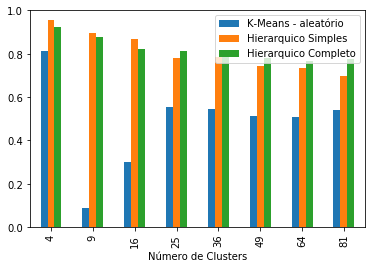

In [37]:
pd.DataFrame(silhuet).plot.bar(x="Número de Clusters",
                                        y =["K-Means - aleatório","Hierarquico Simples","Hierarquico Completo"])

Aqui o algortimo que mais sofre mudanças de desempenho é o K-means. Quando o número de clusters é 9 , o seu desempenho é bem inferior os outros, e até mesmo a execução sem a normalização dos dados. No entanto, ele se mantém estabilizada a partir do cluster 25. 

O Hierárquico não sofreu muita mudanças, está quase que estabilizado em todos os números de clusters. E obteve um desempenho melhor do quando foi executando sem a normalização dos dados. 

O K-means também teve um desempenho melhor.

# Visualização dos Clusters

A visualização dos clusters será dos dados normalizados. E o T-SNE será utilizado para a visualização, já que o mesmo consegue fazer uma redução da dimensionalidade.

In [47]:
tsne = manifold.TSNE(n_components = 2)
tsne_df = pd.DataFrame(tsne.fit_transform(normalizacao))

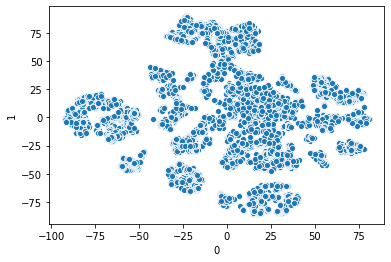

In [48]:
sns.scatterplot(x = tsne_df[0], y = tsne_df[1], data = tsne_df, legend = False)

A partir da plotagem do gráfico é possível ver como os clusters(com a normalização) estão organizados, sendo possível identificar alguns agrupamentos. A região inferior está mais separada que a região superior.

Agora serão visualizados os clusters do Hieráquico( _single complete linkage_ ) e K-means.

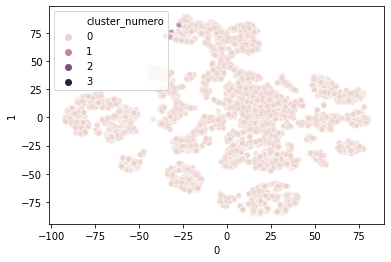

In [60]:
sns.scatterplot(x = tsne_df[0], y = tsne_df[1],hue = labelsnor_hiecompleto[0]['cluster_numero'], legend = 'brief',  alpha = 0.5)

Esse é o agrupamento do Hieráquico Complete Linkage com 4 clusters. É possível percebe que existe um agrupamento dos dados um pouco separados, no inferior do lado esquerdo. Mas no geral, os o dados foram bem separados nos clusters. Provando o que o gráfico da execução do algortimo já tinha mostrado.

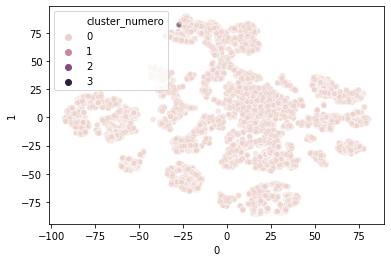

In [67]:
sns.scatterplot(x = tsne_df[0], y = tsne_df[1],hue = labelsnor_hiesimples[0]['cluster_numero'], legend = 'brief',  alpha = 0.5)

Esse é o agrupamento do Hieráquico Single com 4 clusters. Esse algortimo teve um desempenho um pouco melhor que o Hieráquico Complete Linkage. E pode-se ver que o mesmo teve os dados sperados em clusters muito bem, ficando muito parecido com o Complete Linkage.

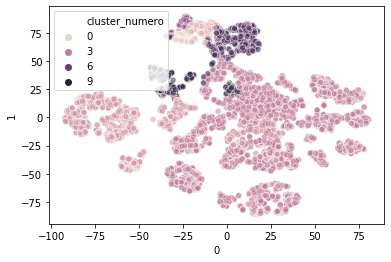

In [63]:
sns.scatterplot(x = tsne_df[0], y = tsne_df[1],hue = labelnor_kmeans[1]['cluster_numero'], legend = 'brief',  alpha = 0.5)

Esse é o agrupamento do K-means com 4 clusters. Apesar do desempenho do algortimo ter sido inferior aos anteriores, é possível ver que os dados foram organizados em alguns clusters. Só que aqui aconteceu mais sobreposição dos dados dos clusters do que nos anteriores. O dados ficaram mais próxim

# Conclusão